# Global sales of EV


The EV vehicles concept was started around early 19th centuary 
but due to high cost of EV vehicle and Non reusable batteries it was not popular in that period 

Again during the end of 19th centuary due to oil crisis and other global factors EV came into picture as alternative.

types of EV:

            1. Battery Electric Vehicles (BEVs)
            2. Fuel Cell Electric Vehicles (FCEVs)
            3. Plug-in Hybrid Electric Vehicles (PHEVs)
depends on factors like driving habits, availability of refuelling or charging infrastructure, and environmental goals.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:

#reading the ev sales data
ev_sales_data = pd.read_csv("IEA Global EV Data 2024.csv")

In [3]:
# top 5 rows of data 
ev_sales_data.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


# Data Dictionary

1. Region :     Country
2. Category :   Historical 
3. parameter:   sales or share or stock
4. mode:        mode of transport
5. powertrain : Type of Electric Vehicle mode
6. year:        Manufacturing Year
7. Unit :       percentr or No.of vehicles

In [4]:
# Checking the null values present in the dataframe
ev_sales_data.isna().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [5]:
#info about the dataframe

ev_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


# Exploratory Data Analysis

Researching on the each feature to check the trend.

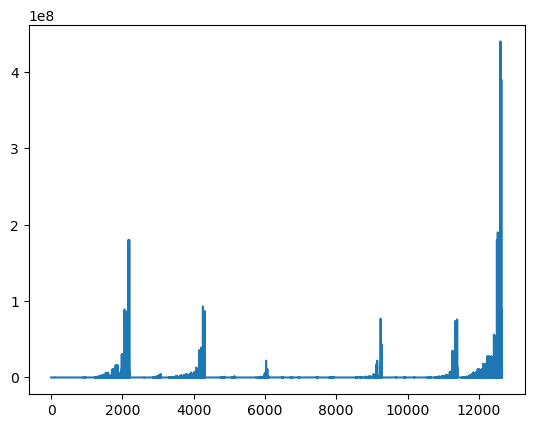

In [6]:
plt.plot(ev_sales_data.value);

In [7]:
ev_sales_data["parameter"].value_counts()

parameter
EV stock                         3470
EV sales                         3372
EV sales share                   1642
EV stock share                   1529
EV charging points                918
Oil displacement Mbd              586
Oil displacement, million lge     586
Electricity demand                551
Name: count, dtype: int64

In [8]:
ev_sales_data["category"].value_counts()

category
Historical          9174
Projection-APS      1742
Projection-STEPS    1738
Name: count, dtype: int64

In [9]:
len(ev_sales_data["value"].value_counts())

1032

In [76]:
ev_sales_data["mode"].value_counts()

mode
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64

In [10]:
ev_sales_data["powertrain"].value_counts()

powertrain
EV                         4894
BEV                        3204
PHEV                       2126
FCEV                       1512
Publicly available slow     463
Publicly available fast     455
Name: count, dtype: int64

In [11]:
ev_sales_data["unit"].value_counts()

unit
Vehicles                         6842
percent                          3171
charging points                   918
Milion barrels per day            586
Oil displacement, million lge     586
GWh                               551
Name: count, dtype: int64

# Data Evaluation 

create the model to predict the future scope or growth demand for the ev sales with a accuracy of 95% to pursue the project


using the autoencoders convert the strings datatypes to numeric data types.

In [13]:
# convert string datatype or object to float datatype

from sklearn import preprocessing

# encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

# ev_sales_data[['region']]= encoder.fit_transform(ev_sales_data[['region']])
encode_df = pd.get_dummies(ev_sales_data,columns=['category'])#, 'category','parameter','mode','powertrain','unit'])

encode_df

,region,parameter,mode,powertrain,year,unit,value,category_Historical,category_Projection-APS,category_Projection-STEPS
0,Australia,EV stock share,Cars,EV,2011,percent,3.900000e-04,True,False,False
1,Australia,EV sales share,Cars,EV,2011,percent,6.500000e-03,True,False,False
2,Australia,EV sales,Cars,BEV,2011,Vehicles,4.900000e+01,True,False,False
3,Australia,EV stock,Cars,BEV,2011,Vehicles,4.900000e+01,True,False,False
4,Australia,EV stock,Cars,BEV,2012,Vehicles,2.200000e+02,True,False,False
...,...,...,...,...,...,...,...,...,...,...
12649,World,EV sales share,Cars,EV,2035,percent,5.500000e+01,False,False,True
12650,World,EV stock share,Cars,EV,2035,percent,3.100000e+01,False,False,True
12651,World,EV charging points,EV,Publicly available fast,2035,charging points,9.400000e+06,False,True,False
12652,World,EV charging points,EV,Publicly available slow,2035,charging points,1.500000e+07,False,True,False


In [14]:
encode_df.head()

,region,parameter,mode,powertrain,year,unit,value,category_Historical,category_Projection-APS,category_Projection-STEPS
0,Australia,EV stock share,Cars,EV,2011,percent,0.00039,True,False,False
1,Australia,EV sales share,Cars,EV,2011,percent,0.00650,True,False,False
2,Australia,EV sales,Cars,BEV,2011,Vehicles,49.00000,True,False,False
3,Australia,EV stock,Cars,BEV,2011,Vehicles,49.00000,True,False,False
4,Australia,EV stock,Cars,BEV,2012,Vehicles,220.00000,True,False,False


In [10]:
ev_sales_data["mode"].value_counts()

mode
Cars      4706
Buses     2696
Vans      2568
Trucks    1766
EV         918
Name: count, dtype: int64

In [14]:
ev_sales_data.sort_values(by=['parameter','region'])

,region,category,parameter,mode,powertrain,year,unit,value
38,Australia,Historical,EV charging points,EV,Publicly available fast,2017,charging points,40.0
39,Australia,Historical,EV charging points,EV,Publicly available slow,2017,charging points,440.0
44,Australia,Historical,EV charging points,EV,Publicly available fast,2018,charging points,61.0
45,Australia,Historical,EV charging points,EV,Publicly available slow,2018,charging points,670.0
54,Australia,Historical,EV charging points,EV,Publicly available slow,2019,charging points,1700.0
...,...,...,...,...,...,...,...,...
12569,World,Projection-APS,"Oil displacement, million lge",Cars,EV,2035,"Oil displacement, million lge",450000.0
12578,World,Projection-STEPS,"Oil displacement, million lge",Buses,EV,2035,"Oil displacement, million lge",30000.0
12579,World,Projection-STEPS,"Oil displacement, million lge",Trucks,EV,2035,"Oil displacement, million lge",87000.0
12580,World,Projection-STEPS,"Oil displacement, million lge",Vans,EV,2035,"Oil displacement, million lge",53000.0
